**Nikhil Jatti**

**Vivekanand Business School**

**PGDM (Business Analytics)**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Load the dataset
disney_shows = pd.read_csv('/content/disney_plus_shows.csv')

In [21]:
disney_shows.describe()

,metascore,imdb_rating
count,292.000000,879.000000
mean,62.061644,6.656428
std,15.776455,1.020352
min,19.000000,1.500000
25%,51.000000,6.100000
50%,61.000000,6.700000
75%,73.000000,7.400000
max,99.000000,9.700000


In [22]:
disney_shows.head(10)

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444"
5,tt1846442,12 Dates of Christmas,"A story that follows Kate, a young woman who a...",movie,PG,2011,11 Dec 2011,"November 12, 2019",90 min,"Comedy, Fantasy, Romance",James Hayman,"Aaron Mendelsohn (teleplay), Janet Brownell (t...","Laura Miyata, Vijay Mehta, Amy Smart, Audrey D...",English,USA,1 nomination.,NaN,6.3,"4,933"
6,tt0046672,"20,000 Leagues Under the Sea",A ship sent to investigate a wave of mysteriou...,movie,G,1954,20 Jul 1955,"November 12, 2019",127 min,"Adventure, Drama, Family, Fantasy, Sci-Fi",Richard Fleischer,Earl Felton (screenplay),"Kirk Douglas, James Mason, Paul Lukas, Peter L...",English,USA,Won 2 Oscars. Another 3 wins & 3 nominations.,83.0,7.2,"27,761"
7,tt0120623,A Bug's Life,"A misfit ant, looking for ""warriors"" to save h...",movie,G,1998,25 Nov 1998,"November 12, 2019",95 min,"Animation, Adventure, Comedy, Family","John Lasseter, Andrew Stanton(co-director)","John Lasseter (original story by), Andrew Stan...","Dave Foley, Kevin Spacey, Julia Louis-Dreyfus,...",English,USA,Nominated for 1 Oscar. Another 14 wins & 20 no...,77.0,7.2,"257,065"
8,tt12076020,A Celebration of the Music from Coco,NaN,movie,NaN,2020,10 Apr 2020,"April 10, 2020",NaN,Music,Ron de Moraes,NaN,"Benjamin Bratt, Eva Longoria",English,USA,NaN,NaN,7.6,35
9,tt0113198,A Goofy Movie,When Max makes a preposterous promise to a gir...,movie,G,1995,07 Apr 1995,"November 12, 2019",78 min,"Animation, Adventure, Comedy, Family, Musical,...",Kevin Lima,"Jymn Magon (story), Jymn Magon (screenplay), C...","Bill Farmer, Jason Marsden, Jim Cummings, Kell...",English,"USA, Australia, France, Canada",5 nominations.,NaN,6.8,"43,655"


In [23]:
disney_shows.tail(10)

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
982,tt0206446,Yellowstone Cubs,"Two bear cubs, Tuffy and Tubby, are separated ...",movie,Not Rated,1963,01 Jun 1963,"November 12, 2019",48 min,Family,Charles L. Draper,Ralph Wright,"Rex Allen, Joe Way",English,USA,1 nomination.,NaN,6.9,177
983,tt0153992,You Lucky Dog,Man leaves his fortune to his dog and its psyc...,movie,TV-G,1998,27 Jun 1998,"November 12, 2019",89 min,"Comedy, Family, Fantasy, Mystery",Paul Schneider,"David Covell (story), David Covell (teleplay),...","Kirk Cameron, Chelsea Noble, John de Lancie, C...",English,USA,NaN,NaN,4.7,526
984,tt0329783,You Wish!,Alex is a high school student who always feels...,movie,TV-G,2003,10 Jan 2003,"November 12, 2019",84 min,"Comedy, Family, Fantasy, Drama",Paul Hoen,"Christopher Reed (teleplay), Cynthia Carle (te...","A.J. Trauth, Spencer Breslin, Lalaine, Tim Reid",English,"New Zealand, USA",3 nominations.,NaN,6.1,"1,608"
985,tt1134859,Your Friend the Rat,Remy and Emile plead the case for rats by illu...,movie,G,2007,06 Nov 2007,"November 12, 2019",11 min,"Animation, Short, Comedy, Family",Jim Capobianco,"Jim Capobianco, Jeff Pidgeon (story), Alexande...","Patton Oswalt, Peter Sohn, Lou Romano, Tony Ru...",English,USA,1 win.,NaN,7.1,"4,944"
986,tt6878820,Z-O-M-B-I-E-S,Students from Zombietown are transferred to a ...,movie,TV-G,2018,16 Feb 2018,"November 12, 2019",94 min,"Family, Musical, Romance",Paul Hoen,"David Light, Joseph Raso, David Light (based o...","Milo Manheim, Meg Donnelly, Trevor Tordjman, K...",English,USA,1 nomination.,NaN,6.3,"2,993"
987,tt3544734,Zapped,"When Zoey's mom remarries, Zoey finds it hard ...",movie,TV-G,2014,23 Jun 2014,"November 12, 2019",102 min,"Comedy, Family, Fantasy",Peter DeLuise,"Leslie Margolis (based on the novel ""Boys Are ...","Zendaya, Chanelle Peloso, Spencer Boldman, Emi...",English,"Canada, USA",5 wins & 1 nomination.,NaN,5.1,"3,750"
988,tt0186726,Zenon: Girl of the 21st Century,An inquisitive teenager pries into suspected d...,movie,TV-G,1999,23 Jan 1999,"November 12, 2019",97 min,"Adventure, Comedy, Family, Sci-Fi",Kenneth Johnson,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Raven-Symoné, Stuart Pankin, H...",English,USA,2 nominations.,NaN,6.4,"6,378"
989,tt0271271,Zenon: The Zequel,A mischievous fifteen-year-old girl living on ...,movie,TV-G,2001,12 Jan 2001,"November 12, 2019",100 min,"Comedy, Family, Adventure, Sci-Fi",Manny Coto,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Shadia Simmons, Lauren Maltby,...",English,"USA, New Zealand",1 nomination.,NaN,5.9,"3,318"
990,tt0379060,Zenon: Z3,The heroine sets out to win an important compe...,movie,TV-G,2004,11 Jun 2004,"November 12, 2019",81 min,"Adventure, Comedy, Family, Sci-Fi",Steve Rash,"Marilyn Sadler (character from the book ""Zenon...","Kirsten Storms, Lauren Maltby, Alyson Morgan, ...",English,USA,NaN,NaN,5.5,"2,339"
991,tt2948356,Zootopia,"In a city of anthropomorphic animals, a rookie...",movie,PG,2016,04 Mar 2016,"November 12, 2019",108 min,"Animation, Adventure, Comedy, Crime, Family, M...","Byron Howard, Rich Moore, Jared Bush(co-director)","Byron Howard (story by), Rich Moore (story by)...","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",English,USA,Won 1 Oscar. Another 46 wins & 71 nominations.,78.0,8.0,"410,437"


In [24]:
disney_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      894 non-null    object 
 1   title        894 non-null    object 
 2   plot         866 non-null    object 
 3   type         894 non-null    object 
 4   rated        742 non-null    object 
 5   year         894 non-null    object 
 6   released_at  874 non-null    object 
 7   added_at     992 non-null    object 
 8   runtime      838 non-null    object 
 9   genre        885 non-null    object 
 10  director     689 non-null    object 
 11  writer       743 non-null    object 
 12  actors       870 non-null    object 
 13  language     856 non-null    object 
 14  country      869 non-null    object 
 15  awards       556 non-null    object 
 16  metascore    292 non-null    float64
 17  imdb_rating  879 non-null    float64
 18  imdb_votes   879 non-null    object 
dtypes: float

# Data Cleaning

In [25]:
# Handle missing values by replacing them with appropriate placeholders or removing rows/columns if necessary
disney_shows.fillna('Unknown', inplace=True)

<ipython-input-25-40d89c719e2e>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  disney_shows.fillna('Unknown', inplace=True)


In [26]:
# Convert 'imdb_votes' to string type, replace 'Unknown' with '0', remove commas, and convert to int
disney_shows['imdb_votes'] = (
    disney_shows['imdb_votes']
    .astype(str)  # Convert to string type
    .replace('Unknown', '0')  # Replace 'Unknown' with '0'
    .str.replace(',', '')  # Remove commas
    .astype(int)  # Convert to integer
)

In [27]:
# Convert 'released_at' and 'runtime' to datetime and numeric
pd.to_datetime(disney_shows['released_at'], errors='coerce')
disney_shows['runtime'] = pd.to_numeric(disney_shows['runtime'].str.replace(' min', ''), errors='coerce')

In [28]:
# Descriptive Statistics
print(disney_shows[['imdb_rating', 'metascore', 'runtime']].describe())

          runtime
count  837.000000
mean    68.314217
std     39.590432
min      1.000000
25%     30.000000
50%     81.000000
75%     96.000000
max    181.000000


In [29]:
# Replace 'Unknown' with NaN and convert to numeric
disney_shows['imdb_rating'] = pd.to_numeric(disney_shows['imdb_rating'].replace('Unknown', np.nan), errors='coerce')

<ipython-input-29-4eda0715b2eb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  disney_shows['imdb_rating'] = pd.to_numeric(disney_shows['imdb_rating'].replace('Unknown', np.nan), errors='coerce')


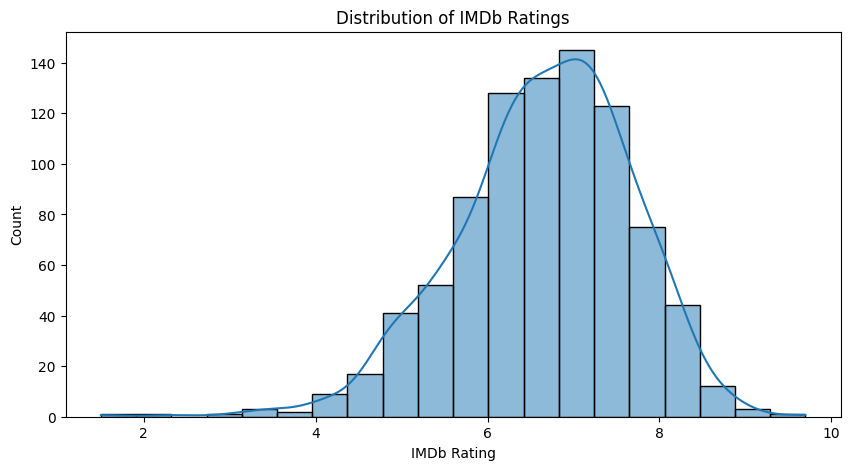

In [30]:
# Distribution Plots
plt.figure(figsize=(10, 5))
sns.histplot(disney_shows['imdb_rating'].dropna(), kde=True, bins=20)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.show()

In [32]:
# Replace 'Unknown' with NaN and convert to numeric
disney_shows['metascore'] = pd.to_numeric(disney_shows['metascore'].replace('Unknown', np.nan), errors='coerce')

<ipython-input-32-843b094157d1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  disney_shows['metascore'] = pd.to_numeric(disney_shows['metascore'].replace('Unknown', np.nan), errors='coerce')


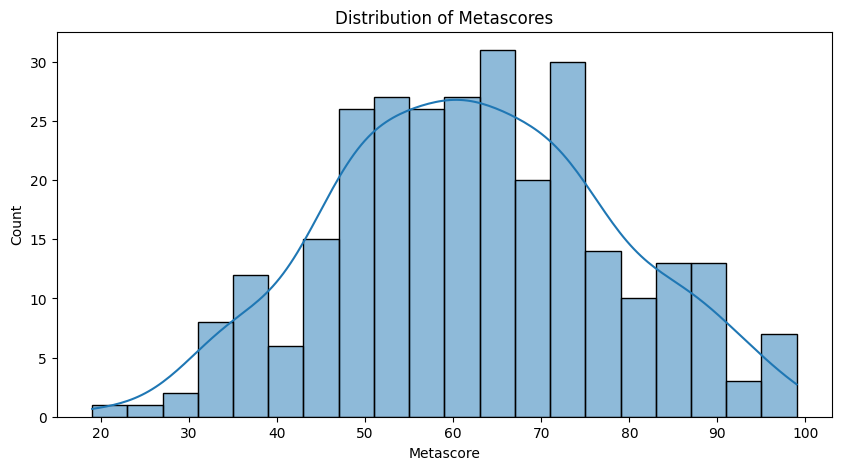

In [33]:
# Distribution Plots
plt.figure(figsize=(10, 5))
sns.histplot(disney_shows['metascore'].dropna(), kde=True, bins=20)
plt.title('Distribution of Metascores')
plt.xlabel('Metascore')
plt.show()

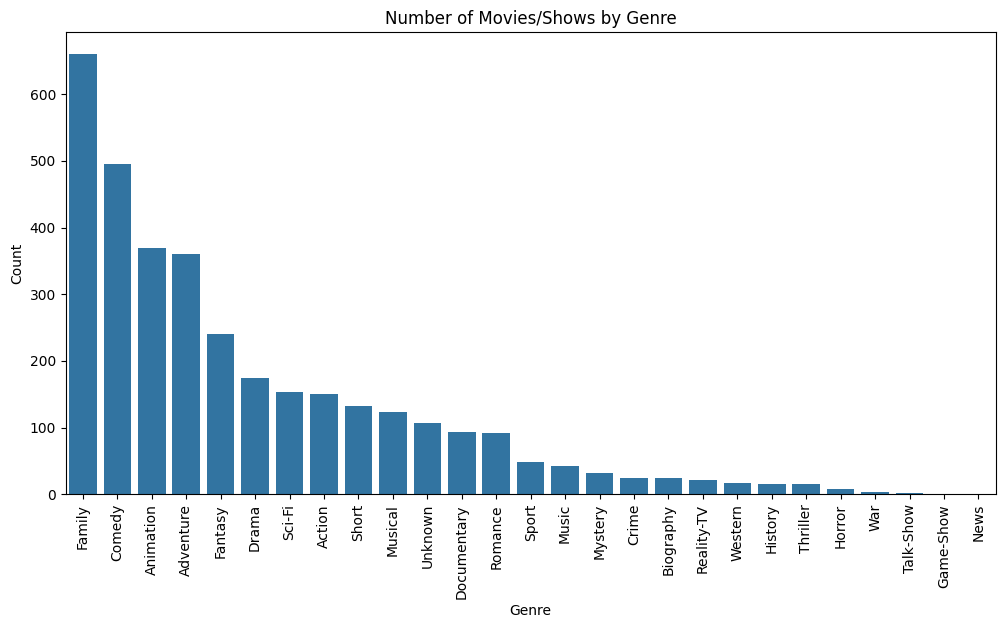

In [34]:
# Genre Analysis
genre_counts = disney_shows['genre'].str.split(', ').explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Movies/Shows by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

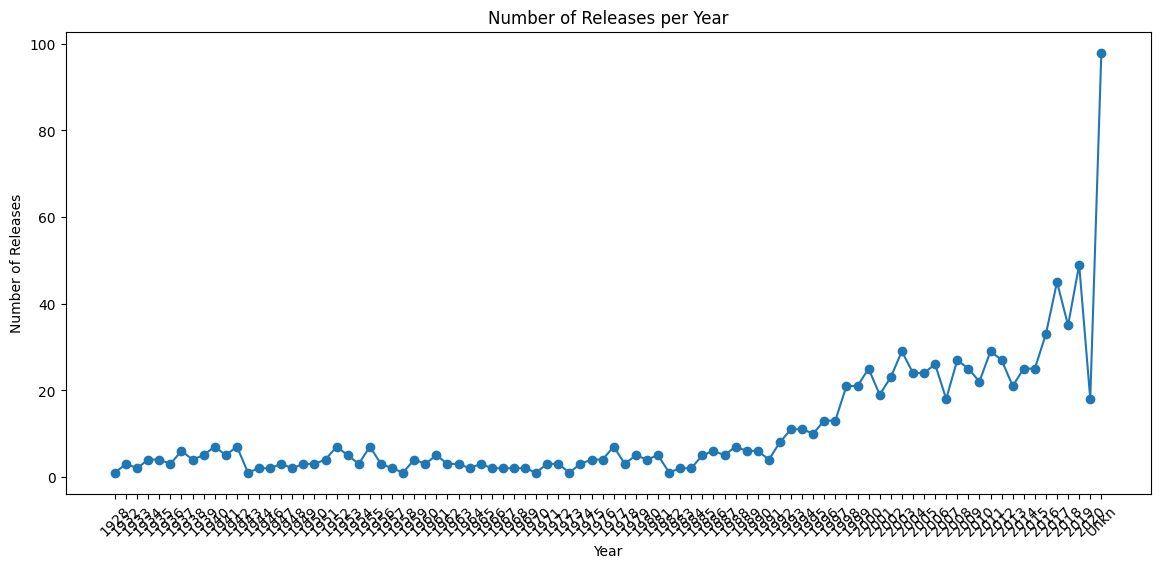

In [35]:
# Release Date Trends
disney_shows['year'] = disney_shows['year'].str[:4]
year_counts = disney_shows['year'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Number of Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.show()

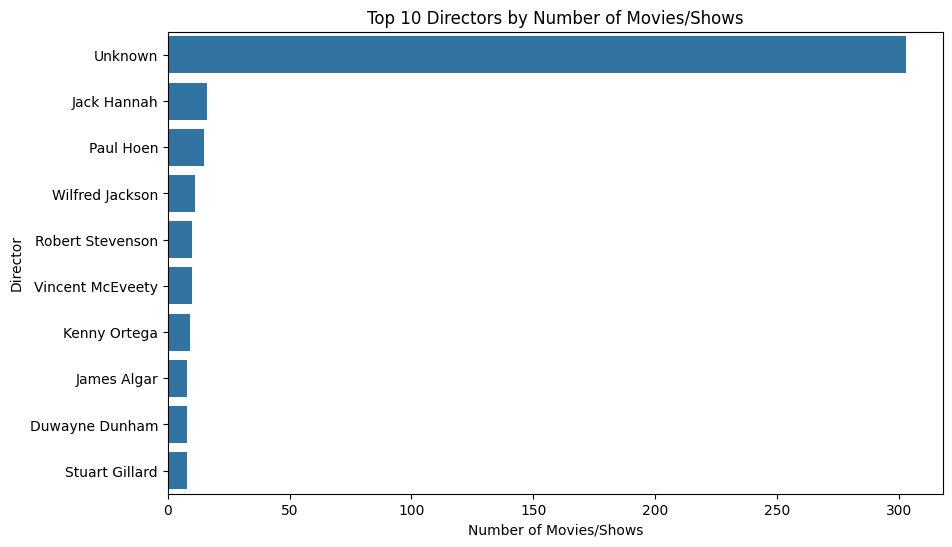

In [36]:
# Top Directors
director_counts = disney_shows['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.values, y=director_counts.index)
plt.title('Top 10 Directors by Number of Movies/Shows')
plt.xlabel('Number of Movies/Shows')
plt.ylabel('Director')
plt.show()

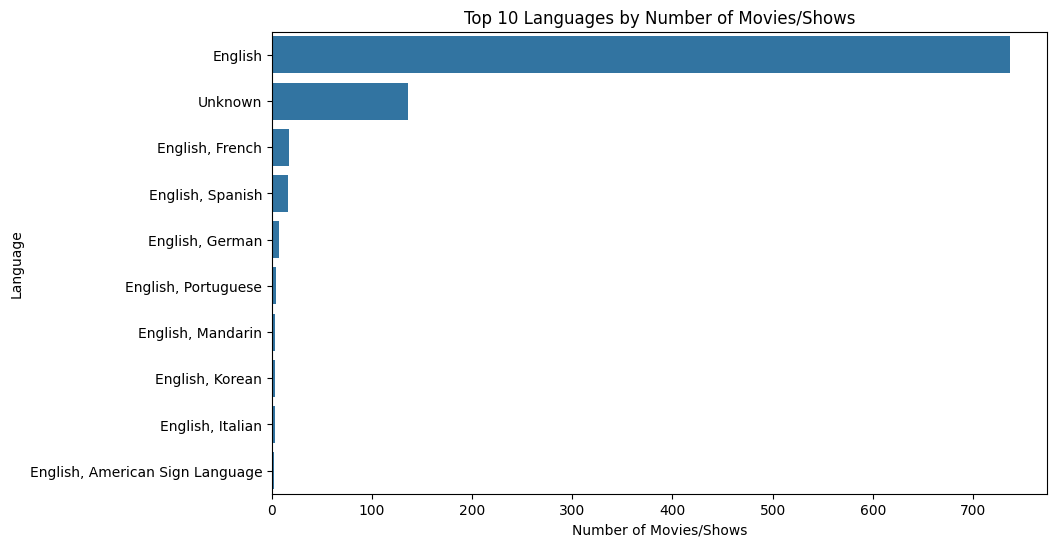

In [37]:
# Language Analysis
language_counts = disney_shows['language'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.values, y=language_counts.index)
plt.title('Top 10 Languages by Number of Movies/Shows')
plt.xlabel('Number of Movies/Shows')
plt.ylabel('Language')
plt.show()

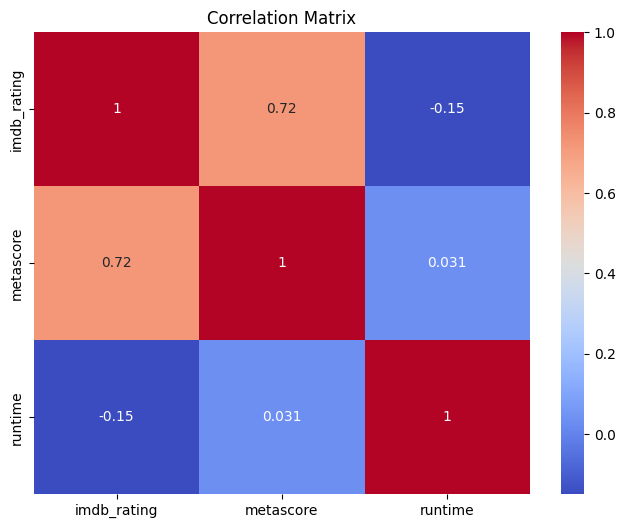

In [38]:
# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(disney_shows[['imdb_rating', 'metascore', 'runtime']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

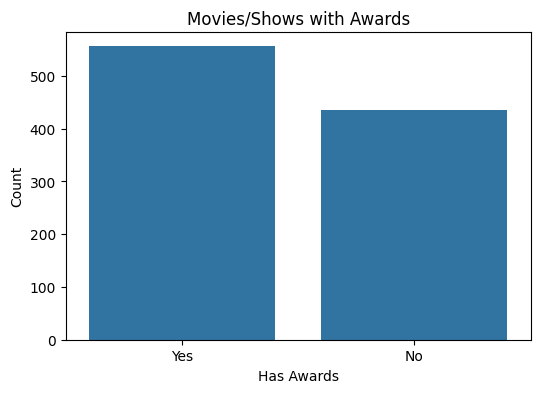

In [39]:
# Award Analysis
disney_shows['has_awards'] = disney_shows['awards'].apply(lambda x: 'Yes' if x != 'Unknown' else 'No')
award_counts = disney_shows['has_awards'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=award_counts.index, y=award_counts.values)
plt.title('Movies/Shows with Awards')
plt.xlabel('Has Awards')
plt.ylabel('Count')
plt.show()

# Linear Regression to predict IMDb Rating

In [65]:
# Remove rows where 'imdb_rating' is NaN
disney_shows = disney_shows.dropna(subset=['imdb_rating'])

In [66]:
# Selecting features and target
# Dropping features with low correlation or potential noise
features = disney_shows[['runtime', 'imdb_votes']]  # Keeping only significant features based on correlation
features = features.replace(0, features.mean())  # Replace zeros with mean for simplicity
features.fillna(features.mean(), inplace=True)  # Handle any remaining NaN values
target = disney_shows['imdb_rating']

In [67]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [68]:
# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Making predictions
y_pred = model.predict(X_test)

In [70]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.0073128870703534
R-squared: 0.1347312950723809


In [71]:
# Displaying coefficients
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})
print(coefficients)

      Feature  Coefficient
0     runtime    -0.008673
1  imdb_votes     0.000002
